
## Project: Investigate a Dataset (TMDB movies data)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# ## Introduction:


-This data set contains information about 10 thousand movies collected from The Movie Database (TMDb)

- a questions to answer :
1-Research Question 1 (rating status for better or for worse ?)
2- Research Question 2  (what relation between high revenue over the year & if the film industry has a raising profit ?)
3- Research question 3 ( The relation between movies numbers and years ?)
4- Research Question 4 (how much average movie long ? )
5- Research question 5 :  ( most popular movies genere ?)


In [54]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


# start importing packges (pandas, numpy,matplotlib ,seaborn(  iKnow its optional but for better visuals ) ,csv ,datetime)

import pandas as pd
import numpy as np
import seaborn as sns
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline



# Data Wrangling



In [55]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [56]:
# a summarization process for data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# ### Data Cleaning

 

In [57]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
dropping  = ["id","imdb_id","cast","homepage","tagline","keywords","overview"]
df.drop(dropping, inplace=True, axis=1)

In [58]:
#  duplications  check
sum(df.duplicated())

1

In [59]:
# duplications dropping 
df.drop_duplicates(inplace=True)


In [60]:
# recheck for duplications to insure process success ( not neccesry but for making sure )
sum(df.duplicated())

0

In [61]:
# converting to datetime of the release date
df["release_date"] = pd.to_datetime(df["release_date"])

In [62]:
# replace yo Nan
df = df.replace(0, np.nan)



In [63]:
# Null dropping 
df = df.dropna()

In [64]:
#  confirming  last process
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 14 columns):
popularity              3807 non-null float64
budget                  3807 non-null float64
revenue                 3807 non-null float64
original_title          3807 non-null object
director                3807 non-null object
runtime                 3807 non-null float64
genres                  3807 non-null object
production_companies    3807 non-null object
release_date            3807 non-null datetime64[ns]
vote_count              3807 non-null int64
vote_average            3807 non-null float64
release_year            3807 non-null int64
budget_adj              3807 non-null float64
revenue_adj             3807 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(4)
memory usage: 446.1+ KB


# Research Question 1 (rating status for better or for worse ?)

In [65]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def average_grouping(column1,column2):
    avg_grouping_data = df.groupby(column1)[column2].mean()
    return avg_grouping_data 

Text(0,0.5,'Average Rating')

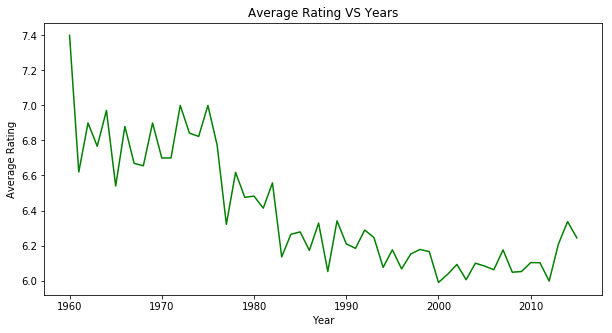

In [66]:
# calling the average_grouping
avg_yearly_rating = average_grouping("release_year","vote_average")

# release date & voting relation 
avg_yearly_rating.plot(kind='line',color='green',title='Average Rating VS Years',figsize = (10,5))
# the x-axis (year)
plt.xlabel('Year')
#the y-axis (Average Rating)
plt.ylabel('Average Rating')

### Research Question 2  (what relation between high revenue over the year & if the film industry has a raising profit ?)

In [67]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.insert(1,"profit",df["revenue"] - df["budget"])
df.head()

,popularity,profit,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,1.852382e+08,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,1.868178e+09,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1.316249e+09,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Text(0,0.5,'Profit')

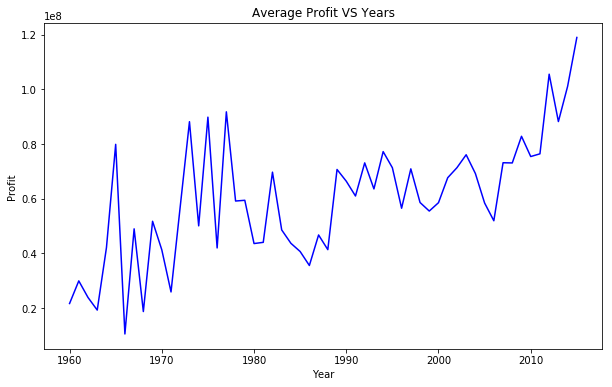

In [68]:

#calling The average_grouping througth  the value of profits &release year 
yearly_average_profit = average_grouping("release_year","profit")

# relation between last two process ( release year , profits)
yearly_average_profit.plot(kind='line',color='blue',title='Average Profit VS Years',figsize = (10,6))
# The x-axis Year
plt.xlabel('Year')
# The y-axis Profit
plt.ylabel('Profit')

# Research question 3 ( The relation between movies numbers and years ?)

Text(0,0.5,'Year')

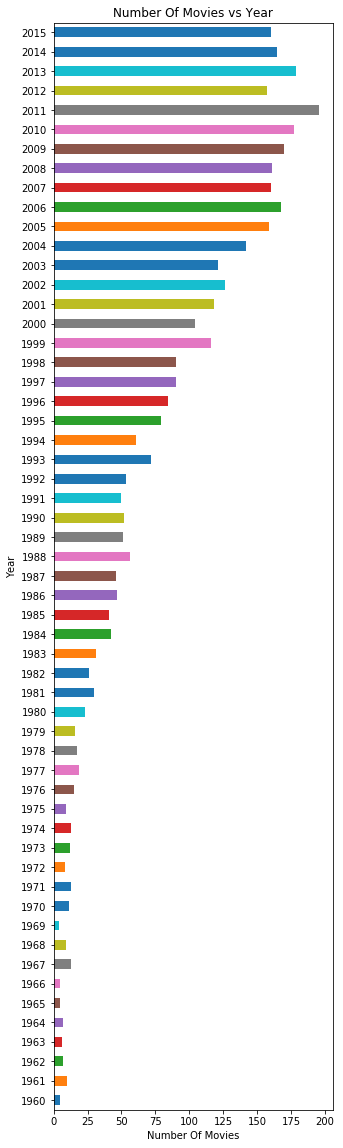

In [69]:

# counting howmany movies in a year 
movies_number_yearly = df["release_year"].value_counts().sort_index()

# relation between Them ( # of movies & release year)
movies_number_yearly.plot(kind='barh',title='Number Of Movies vs Year', figsize=(5,20))
# the x-axis Number Of Movies
plt.xlabel('Number Of Movies')
# The y-axis Year
plt.ylabel('Year')

# Research Question 4 (how much average movie long ? )


In [70]:
df["runtime"].describe()

count    3807.000000
mean      109.350932
std        19.845761
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

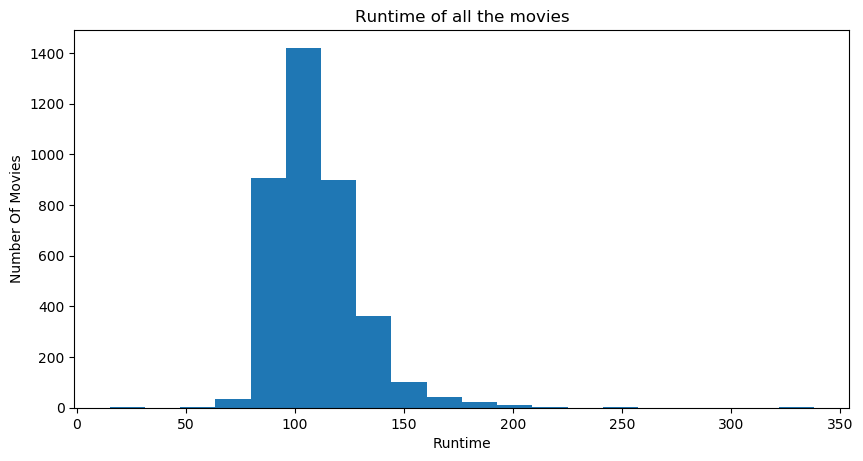

In [71]:
# the histograms plot
plt.figure(figsize=(10,5), dpi = 100)

# the x-axis Runtime
plt.xlabel('Runtime')
# The y-axis Number Of Movies
plt.ylabel('Number Of Movies')
# The Runtime of all the movies histogram 
plt.title('Runtime of all the movies')

# runtime relation with # of movies
plt.hist(df['runtime'], bins =20);

The results of research Q 4 :The Total  average runtime is 109 min.

and it as follows :

   1-  75% of movies : with less than 119 min runtime 
   2-  50% of movies : with less than 106 runtime 
   3-  25% of movies  : with less than 96 min runtime 
   

#    Research question 5 :  ( most popular movies genere ?)

In [72]:

# creating a function to sperate each genere with its number of movie s
def separating_genre(column):
    data_spliting = pd.Series(df[column].str.cat(sep = '|').split('|'))
    
    data_counting = data_spliting.value_counts(ascending=False)
    return data_counting

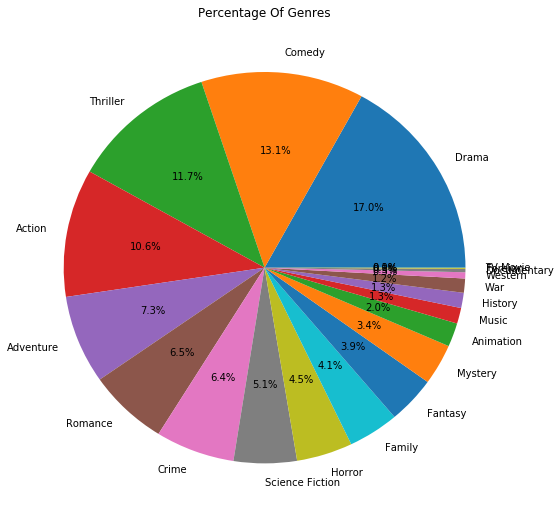

In [73]:
# The Data visualization plot

# genre& number of movies relation

separating_genre("genres").plot(kind="pie",figsize=(9,9),autopct="%1.1f%%")

# Title 

plt.title('Percentage Of Genres')

plt.ylabel('');



## Conclusions
